# Data Science Case Study

## Churn Prediction with Telecom Data

* **AUTHOR**: *Emre Okçular*
* **DATE**: 23.07.2019 Tuesday

## Descriptive Analysis

Firstly, I installed virtualenv and vitualenvwrapper packages. Then I created a virtual environment for this case study project. Virtualenv is used to manage Python packages for different projects. Using virtualenv allows you to avoid installing Python packages globally which could break system tools or other projects. Below, you can see the packages that I used for this analysis.

In [1]:
pip freeze # Package Dependencies

appnope==0.1.0
attrs==19.1.0
backcall==0.1.0
bleach==3.1.0
cycler==0.10.0
decorator==4.4.0
defusedxml==0.6.0
entrypoints==0.3
graphviz==0.11.1
ipykernel==5.1.1
ipython==7.6.1
ipython-genutils==0.2.0
ipywidgets==7.5.0
jedi==0.14.1
Jinja2==2.10.1
joblib==0.13.2
jsonschema==3.0.1
jupyter==1.0.0
jupyter-client==5.3.1
jupyter-console==6.0.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextensions==0.5.1
jupyter-core==4.5.0
jupyter-highlight-selected-word==0.2.0
jupyter-latex-envs==1.4.6
jupyter-nbextensions-configurator==0.4.1
kiwisolver==1.1.0
lxml==4.3.4
MarkupSafe==1.1.1
matplotlib==3.1.1
mistune==0.8.4
nbconvert==5.5.0
nbformat==4.4.0
notebook==6.0.0
numpy==1.16.4
pandas==0.25.0
pandoc==1.0.2
pandocfilters==1.4.2
parso==0.5.1
pexpect==4.7.0
pickleshare==0.7.5
plotly==4.0.0
ply==3.11
prometheus-client==0.7.1
prompt-toolkit==2.0.9
ptyprocess==0.6.0
Pygments==2.4.2
pyparsing==2.4.0
pyrsistent==0.15.3
python-dateutil==2.8.0
pytz==2019.1
PyYAML==5.1.1
pyzmq==18.0.2
qtconsole==4.5.1
retrying=

In [ ]:
pip install requirements.txt # You need to install required packages.

In [1]:
#Necessary imports 
import pandas as pd # Most common library for data science
pd.options.display.max_rows = 500 # I set max rows to see more output
pd.options.display.max_columns = 500 # I set max columns to see more outputs.
import numpy as np # Numerical callculations with data.
from sklearn.linear_model import LogisticRegression # Machine Learning Models and tools
from sklearn.model_selection import train_test_split # Machine Learning Models and tools
from sklearn.feature_selection import RFE # Machine Learning Models and tools
from sklearn.feature_selection import SelectKBest # Machine Learning Models and tools
from sklearn.feature_selection import chi2 # Machine Learning Models and tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # Preprocessing tools.
from sklearn.ensemble import RandomForestClassifier # Random Forest Machine Learning Algorithm
from sklearn import metrics # Metrics.
from sklearn import tree # Decision Tree
from sklearn.model_selection import GridSearchCV # Parameter tuning.
import graphviz # Visualisation
from plotly.offline import init_notebook_mode, iplot # Visualisation
from pandas.plotting import parallel_coordinates # Visualisation
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
%matplotlib inline
%config InlineBackend.figure_format='retina' # I set this property for high resolution for graphs.
import warnings # Supress warnings.
warnings.filterwarnings('ignore')
import xlrd # Read excel files.
import os # Operating System
import sys # System

In [2]:
sys.version[0:5] # Python 3 is used.

'3.7.0'

In [3]:
#Read data from local disc
data = pd.read_csv('/Users/emre/Dev/Envs/DataScience/data/churn_data.csv')
metadata = pd.read_excel('/Users/emre/Dev/Envs/DataScience/data/churn_metadata.xlsx')

In [4]:
data.size

5007900

In [5]:
print("Total Size               : "  , str(data.size))
print ("Total Number of Rows     : " ,data.shape[0])
print ("Total Number of Columns  : " ,data.shape[1])

Total Size               :  5007900
Total Number of Rows     :  50079
Total Number of Columns  :  100


In [6]:
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())


Features : 
 ['Customer_ID', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'av

In [7]:
print ("\nUnique values :  \n",data.nunique())


Unique values :  
 Customer_ID         50079
rev_Mean            25192
mou_Mean             8010
totmrc_Mean          5353
da_Mean               144
ovrmou_Mean          2101
ovrrev_Mean          7974
vceovr_Mean          5345
datovr_Mean           530
roam_Mean            3547
change_mou           6124
change_rev          20961
drop_vce_Mean         284
drop_dat_Mean          50
blck_vce_Mean         357
blck_dat_Mean          35
unan_vce_Mean         841
unan_dat_Mean          33
plcd_vce_Mean        2492
plcd_dat_Mean         299
recv_vce_Mean        1511
recv_sms_Mean          71
comp_vce_Mean        1995
comp_dat_Mean         283
custcare_Mean         174
ccrndmou_Mean         375
cc_mou_Mean          6791
inonemin_Mean        1081
threeway_Mean          68
mou_cvce_Mean       39433
mou_cdat_Mean        2714
mou_rvce_Mean       31753
owylis_vce_Mean       765
mouowylisv_Mean     19081
iwylis_vce_Mean       444
mouiwylisv_Mean     14744
peak_vce_Mean        1801
peak_dat_Mean     

In [8]:
data.describe()

Customer_ID      rev_Mean      mou_Mean   totmrc_Mean       da_Mean  \
count  5.007900e+04  49932.000000  49932.000000  49932.000000  49932.000000   
mean   1.049990e+06     58.605808    511.867777     46.170711      0.886424   
std    2.882829e+04     44.432651    523.521413     23.700695      2.187620   
min    1.000001e+06     -5.862500      0.000000     -9.030000      0.000000   
25%    1.025054e+06     33.240000    148.750000     30.000000      0.000000   
50%    1.049970e+06     48.001250    354.250000     44.990000      0.247500   
75%    1.074975e+06     70.745000    698.250000     59.990000      0.742500   
max    1.099998e+06    983.125000   6704.250000    409.990000     72.765000   

        ovrmou_Mean   ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean  \
count  49932.000000  49932.000000  49932.000000  49932.000000  49932.000000   
mean      41.206099     13.582805     13.318369      0.261355      1.202173   
std       98.741371     30.712862     30.319873      3.257460      7.411250   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.500000      0.900000      0.555000      0.000000      0.000000   
75%       42.000000     14.350000     13.950000      0.000000      0.235000   
max     4320.750000    890.762500    890.762500    423.540000    643.215000   

         change_mou    change_rev  drop_vce_Mean  drop_dat_Mean  \
count  49677.000000  49677.000000   50079.000000   50079.000000   
mean     -14.445552     -1.226900       5.937908       0.039538   
std      255.881698     37.593972       9.002923       0.561388   
min    -3875.000000   -768.575000       0.000000       0.000000   
25%      -88.250000     -7.332500       0.666667       0.000000   
50%       -6.250000     -0.300000       3.000000       0.000000   
75%       62.750000      1.575000       7.666667       0.000000   
max     2659.000000    895.567500     232.666667      58.000000   

       blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  \
count   50079.000000   50079.000000   50079.000000   50079.000000   
mean        4.000586       0.026618      27.688948       0.028049   
std        10.704397       1.930457      38.356642       0.422758   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       5.000000       0.000000   
50%         1.000000       0.000000      15.666667       0.000000   
75%         3.666667       0.000000      35.666667       0.000000   
max       384.333333     413.333333     848.666667      52.000000   

       plcd_vce_Mean  plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  \
count   50079.000000   50079.000000   50079.000000   50079.000000   
mean      144.606715       0.894823      54.886676       0.047591   
std       158.913263       8.925890      85.516149       1.630220   
min         0.000000       0.000000       0.000000       0.000000   
25%        38.000000       0.000000       5.333333       0.000000   
50%       100.000000       0.000000      26.333333       0.000000   
75%       198.000000       0.000000      71.000000       0.000000   
max      2289.000000     547.333333    2607.000000     247.666667   

       comp_vce_Mean  comp_dat_Mean  custcare_Mean  ccrndmou_Mean  \
count   50079.000000   50079.000000   50079.000000   50079.000000   
mean      108.751343       0.800618       1.798315       4.697252   
std       119.211623       8.027889       5.674131      12.829220   
min         0.000000       0.000000       0.000000       0.000000   
25%        28.333333       0.000000       0.000000       0.000000   
50%        75.666667       0.000000       0.000000       0.000000   
75%       150.000000       0.000000       1.666667       4.000000   
max      1894.333333     451.333333     675.333333     861.333333   

        cc_mou_Mean  inonemin_Mean  threeway_Mean  mou_cvce_Mean  \
count  50079.000000   50079.000000   50079.000

In [9]:
data.head(10)

Customer_ID  rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
0      1000001   23.9975    219.25        22.50   0.2475          0.0   
1      1000004   38.0000      7.50        38.00   0.0000          0.0   
2      1000006   82.2750   1312.25        75.00   1.2375          0.0   
3      1000007   17.1450      0.00        16.99   0.0000          0.0   
4      1000009   97.3375   1039.00        50.00   4.9500        419.5   
5      1000013   81.0000   1056.25        75.00   0.0000          0.0   
6      1000014   25.2250      2.50        25.00   0.0000          0.0   
7      1000015  212.5150   1971.50        84.99   2.2275        249.5   
8      1000016   42.5650    270.50        37.48   0.2475          6.0   
9      1000019   55.2700   1212.75        49.99   0.7425          0.0   

   ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  \
0         0.00         0.00          0.0     0.0000     -157.25    -18.9975   
1         0.00         0.00          0.0     0.0000       -1.50      0.0000   
2         0.00         0.00          0.0     0.0000      156.75      8.1450   
3         0.00         0.00          0.0     0.0000        0.00     -0.1550   
4        41.95        41.95          0.0     0.0000      198.00     23.2625   
5         0.00         0.00          0.0     0.0000       42.75      2.3500   
6         0.00         0.00          0.0     0.0000       -2.50     -0.2250   
7        99.80        99.80          0.0    35.4975     -200.50   -106.7650   
8         1.50         1.50          0.0     0.0000      201.50     -1.7850   
9         0.00         0.00          0.0     1.2850      169.25      0.9900   

   drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  unan_vce_Mean  \
0       0.666667            0.0       0.666667            0.0       6.333333   
1       0.000000            0.0       0.000000            0.0       0.000000   
2      52.000000            0.0       7.666667            0.0      76.000000   
3       0.000000            0.0       0.000000            0.0       0.000000   
4      12.666667            0.0       3.000000            0.0     176.000000   
5       0.000000            0.0       0.000000            0.0       0.000000   
6       0.000000            0.0       0.000000            0.0       0.333333   
7       9.000000            0.0       0.000000            0.0      43.666667   
8       3.333333            0.0       1.666667            0.0       7.666667   
9       2.666667            0.0       6.000000            0.0      43.666667   

   unan_dat_Mean  plcd_vce_Mean  plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  \
0            0.0      52.333333            0.0      42.333333            0.0   
1            0.0       3.666667            0.0       1.333333            0.0   
2            0.0     702.000000            0.0     365.000000            0.0   
3            0.0       0.000000            0.0       0.000000            0.0   
4            0.0     533.666667            0.0      96.000000            0.0   
5            0.0       0.000000            0.0       0.000000            0.0   
6            0.0       1.333333            0.0       0.333333            0.0   
7            0.0     344.666667            0.0     271.333333            0.0   
8            0.0      67.666667            0.0      25.333333            0.0   
9            0.0     225.000000            0.0     121.666667            0.0   

   comp_vce_Mean  comp_dat_Mean  custcare_Mean  ccrndmou_Mean  cc_mou_Mean  \
0      45.000000            0.0       0.000000       0.000000     0.000000   
1       3.666667            0.0       0.000000       0.000000     0.000000   
2     577.333333            0.0       4.333333      11.000000     7.753333   
3       0.000000            0.0       0.000000       0.000000     0.000000   
4     346.666667            0.0      11.333333      13.666667     6.250000   
5       0.000000            0.0       0.000000       0.000000     0.000000   
6       1.000000     

In [10]:
metadata

Column Name      Type  \
0        Customer_ID  Numeric   
1           rev_Mean  Numeric   
2           mou_Mean  Numeric   
3        totmrc_Mean  Numeric   
4            da_Mean  Numeric   
5        ovrmou_Mean  Numeric   
6        ovrrev_Mean  Numeric   
7        vceovr_Mean  Numeric   
8        datovr_Mean  Numeric   
9          roam_Mean  Numeric   
10        change_mou  Numeric   
11        change_rev  Numeric   
12     drop_vce_Mean  Numeric   
13     drop_dat_Mean  Numeric   
14     blck_vce_Mean  Numeric   
15     blck_dat_Mean  Numeric   
16     unan_vce_Mean  Numeric   
17     unan_dat_Mean  Numeric   
18     plcd_vce_Mean  Numeric   
19     plcd_dat_Mean  Numeric   
20     recv_vce_Mean  Numeric   
21     recv_sms_Mean  Numeric   
22     comp_vce_Mean  Numeric   
23     comp_dat_Mean  Numeric   
24     custcare_Mean  Numeric   
25     ccrndmou_Mean  Numeric   
26       cc_mou_Mean  Numeric   
27     inonemin_Mean  Numeric   
28     threeway_Mean  Numeric   
29     mou_cvce_Mean  Numeric   
30     mou_cdat_Mean  Numeric   
31     mou_rvce_Mean  Numeric   
32   owylis_vce_Mean  Numeric   
33   mouowylisv_Mean  Numeric   
34   iwylis_vce_Mean  Numeric   
35   mouiwylisv_Mean  Numeric   
36     peak_vce_Mean  Numeric   
37     peak_dat_Mean  Numeric   
38     mou_peav_Mean  Numeric   
39     mou_pead_Mean  Numeric   
40      opk_vce_Mean  Numeric   
41      opk_dat_Mean  Numeric   
42     mou_opkv_Mean  Numeric   
43     mou_opkd_Mean  Numeric   
44     drop_blk_Mean  Numeric   
45      attempt_Mean  Numeric   
46     complete_Mean  Numeric   
47     callfwdv_Mean  Numeric   
48     callwait_Mean  Numeric   
49            months  Numeric   
50          uniqsubs  Numeric   
51          actvsubs  Numeric   
52          new_cell   String   
53          crclscod   String   
54          asl_flag   String   
55          totcalls  Numeric   
56            totmou  Numeric   
57            totrev  Numeric   
58            adjrev  Numeric   
59            adjmou  Numeric   
60            adjqty  Numeric   
61            avgrev  Numeric   
62            avgmou  Numeric   
63            avgqty  Numeric   
64           avg3mou  Numeric   
65           avg3qty  Numeric   
66           avg3rev  Numeric   
67           avg6mou  Numeric   
68           avg6qty  Numeric   
69           avg6rev  Numeric   
70  prizm_social_one   String   
71              area   String   
72          dualband   String   
73        refurb_new   String   
74         hnd_price  Numeric   
75            phones  Numeric   
76            models  Numeric   
77        hnd_webcap   String   
78             truck  Numeric   
79                rv  Numeric   
80           ownrent   String   
81               lor  Numeric   
82          dwlltype   String   
83           marital   String   
84            adults  Numeric   
85          infobase   String   
86            income  Numeric   
87          numbcars  Numeric   
88          HHstatin   String   
89          dwllsize   String   
90          forgntvl  Numeric   
91            ethnic   String   
92            kid0_2   String   
93            kid3_5   String   
94           kid6_10   String   
95          kid11_15   String   
96          kid16_17   String   
97          creditcd   String   
98           eqpdays  Numeric   
99             churn  Numeric   

                                          Description  
0                                                   N  
1                Mean monthly revenue (charge amount)  
2               Mean number of monthly minutes of use  
3                 Mean total monthly recurring charge  
4             Mean number of directory assisted calls  
5                         Mean overage minutes of use  
6                                Mean overage revenue  
7                       Mean revenue of voice overage  
8                        Mean revenue of data overage  
9                        Mean number of roaming calls  
10  Percentage change in monthly minutes of use vs...  
11

In [11]:
print("Total missing values : "+str(data.isnull().sum().sum()))

Total missing values : 171615


In [12]:
data.isnull().sum()

Customer_ID             0
rev_Mean              147
mou_Mean              147
totmrc_Mean           147
da_Mean               147
ovrmou_Mean           147
ovrrev_Mean           147
vceovr_Mean           147
datovr_Mean           147
roam_Mean             147
change_mou            402
change_rev            402
drop_vce_Mean           0
drop_dat_Mean           0
blck_vce_Mean           0
blck_dat_Mean           0
unan_vce_Mean           0
unan_dat_Mean           0
plcd_vce_Mean           0
plcd_dat_Mean           0
recv_vce_Mean           0
recv_sms_Mean           0
comp_vce_Mean           0
comp_dat_Mean           0
custcare_Mean           0
ccrndmou_Mean           0
cc_mou_Mean             0
inonemin_Mean           0
threeway_Mean           0
mou_cvce_Mean           0
mou_cdat_Mean           0
mou_rvce_Mean           0
owylis_vce_Mean         0
mouowylisv_Mean         0
iwylis_vce_Mean         0
mouiwylisv_Mean         0
peak_vce_Mean           0
peak_dat_Mean           0
mou_peav_Mea

In [13]:
sizes = data['churn'].value_counts(sort = True)
colors = ["blue","tomato"]
labels = ["NotChurn","Churn"]

Text(0.5, 1.0, 'Churn Ratio')

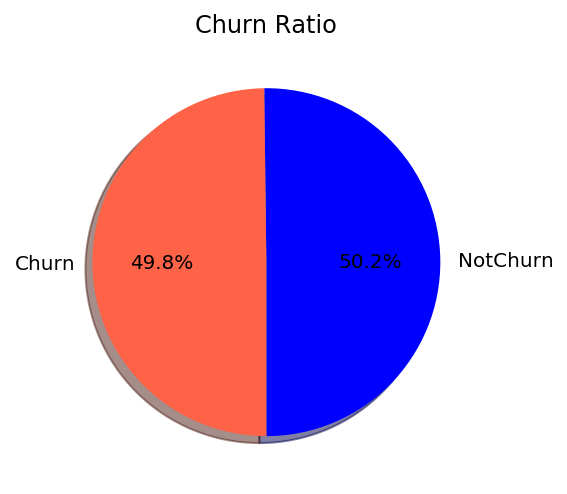

In [14]:
plt.pie(sizes, colors=colors,labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Churn Ratio')

## Data Cleaning and Preprocessing

In [15]:
data_not_nulls=data.dropna()

In [16]:
print('Total Number of Null Values : '+str(data_not_nulls.isnull().sum().sum()))

Total Number of Null Values : 0


In [17]:
data_not_nulls.size

1331500

In [18]:
'Total Number of Rows : '+str(data_not_nulls.shape[0])+' and Total Number of Columns : '+str(data_not_nulls.shape[1])

'Total Number of Rows : 13315 and Total Number of Columns : 100'

In [19]:
# If all of the null vaulues removed, clean dataset is 26.5% of the original dataset.
(int(data_not_nulls.size)/int(data.size))*100

26.587990974260666

Since the null values are not few, I decided to impute null values. 

Numerical values imputed with average of every column.

I have thought of imuting string variables with mode but it might distort the model and the outcome might be biased.
Therefore I filled Null string values with 'unknown'

In [20]:
def imputeMissingValues(x):
    tmp=0
    for i in range(1,x.isnull().sum().count()):
        if np.array(data.isnull().sum())[i]!=0 and str(data[data.columns[i]].dtype)=='object':
            tmp+=np.array(data.isnull().sum())[i]
            data[data.columns[i]].fillna('unknown', inplace=True)
        if np.array(data.isnull().sum())[i]!=0 and str(data[data.columns[i]].dtype)!='object':
            tmp+=np.array(data.isnull().sum())[i]
            data[data.columns[i]].fillna(data[data.columns[i]].mean(), inplace=True)
    print('Total number of imputed values='+str(tmp))

In [21]:
imputeMissingValues(data)

Total number of imputed values=171615


In [22]:
# Binary Conversion
data['asl_flag'].replace(['Y','N'],[1,0],inplace=True)
data['dualband'].replace(['Y','N'],[1,0],inplace=True)
data['creditcd'].replace(['Y','N'],[1,0],inplace=True)

Histogram of Revneue Mean


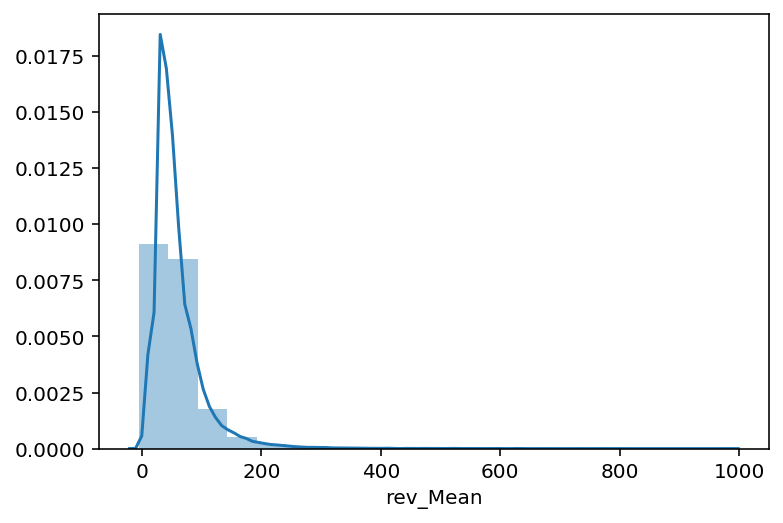

In [22]:
print('Histogram of Revneue Mean')
sns.distplot( data["rev_Mean"] , bins=20 )

Histogram of Current Equipment


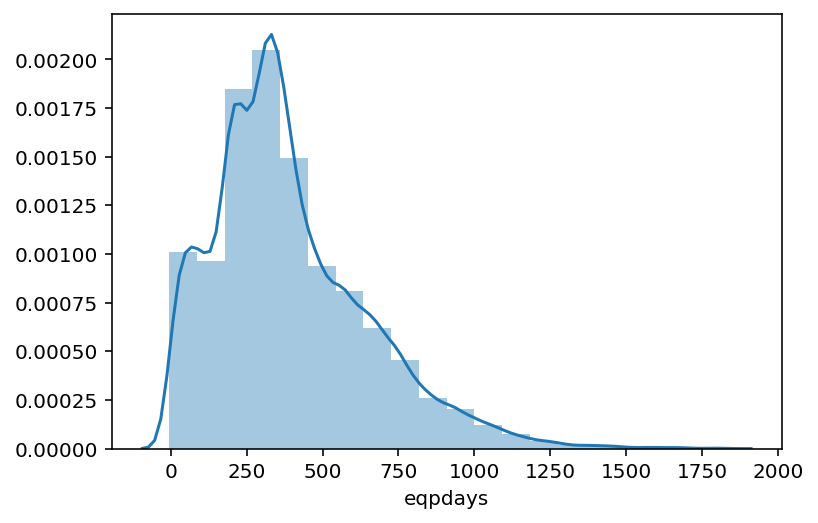

In [23]:
print('Histogram of Current Equipment')
sns.distplot( data["eqpdays"] , bins=20 )

Bar Plot of Areas


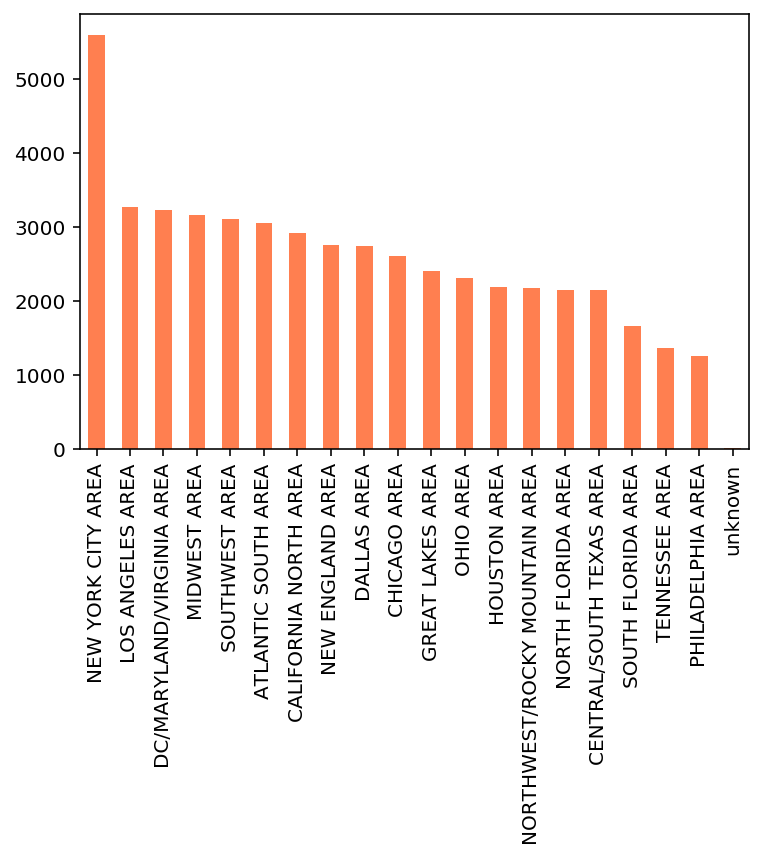

In [24]:
print('Bar Plot of Areas')
data['area'].value_counts().plot('bar',color='coral')

Bar Plot of Social Group


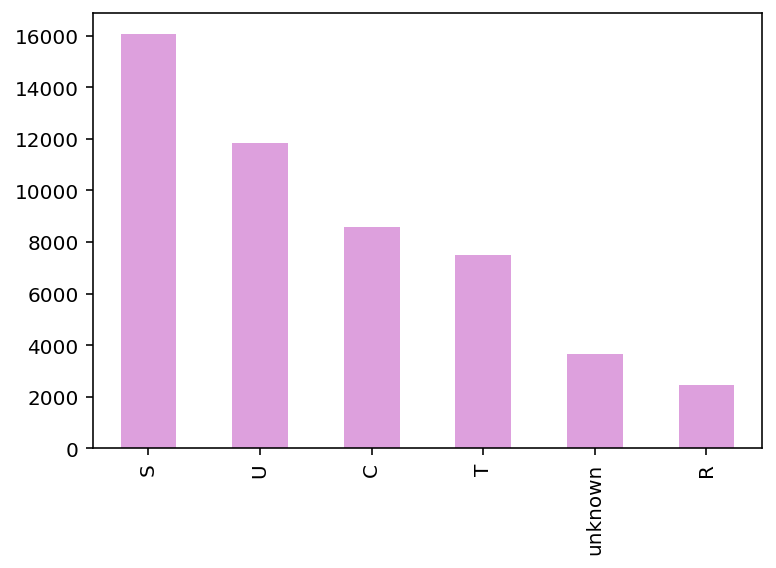

In [25]:
print('Bar Plot of Social Group')
data['prizm_social_one'].value_counts().plot('bar',color='plum')

Bar Plot of Martial Status


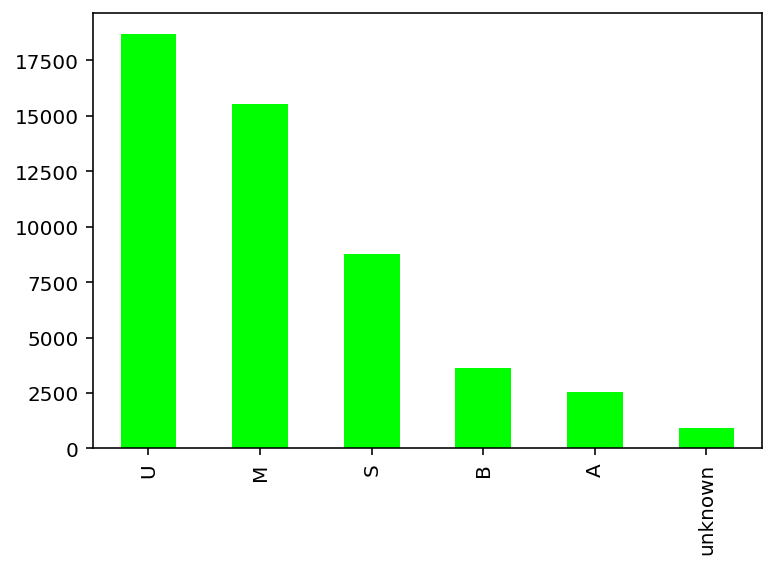

In [26]:
print('Bar Plot of Martial Status')
data['marital'].value_counts().plot('bar',color='lime')

Plot of Rev Mean by Total Rev


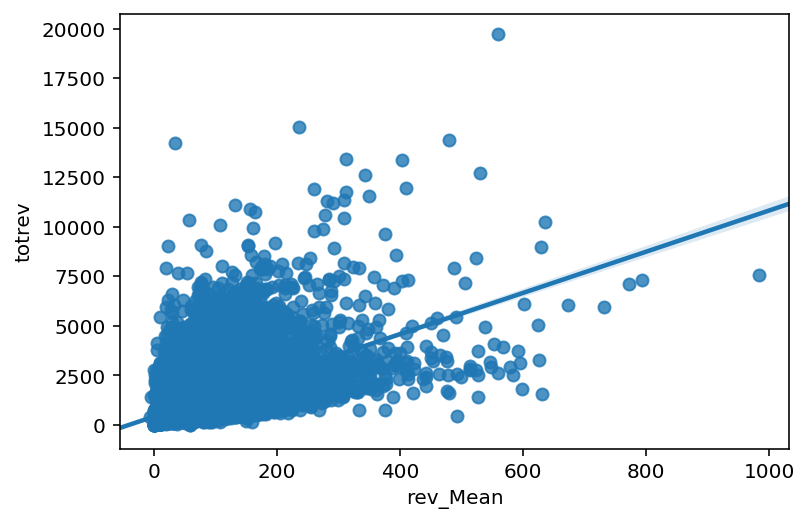

In [27]:
print('Plot of Rev Mean by Total Rev')
sns.regplot(x=data["rev_Mean"], y=data["totrev"])

In [28]:
print('Correlation with Churn')
data.corr()['churn'].sort_values()

Correlation with Churn


hnd_price         -0.106244
totmrc_Mean       -0.065459
models            -0.050700
mou_Mean          -0.050261
complete_Mean     -0.048666
comp_vce_Mean     -0.048355
mou_cvce_Mean     -0.046583
attempt_Mean      -0.045926
plcd_vce_Mean     -0.045586
opk_vce_Mean      -0.044701
peak_vce_Mean     -0.044486
avg3mou           -0.043154
phones            -0.042486
mou_opkv_Mean     -0.042245
Customer_ID       -0.041617
mou_peav_Mean     -0.041549
lor               -0.040506
avg3qty           -0.040247
mou_rvce_Mean     -0.039167
owylis_vce_Mean   -0.038446
recv_vce_Mean     -0.037927
iwylis_vce_Mean   -0.037443
avg6mou           -0.036700
ccrndmou_Mean     -0.035691
change_mou        -0.035142
avg6qty           -0.034792
unan_vce_Mean     -0.034570
cc_mou_Mean       -0.033299
custcare_Mean     -0.032824
mouiwylisv_Mean   -0.032159
inonemin_Mean     -0.031905
mouowylisv_Mean   -0.029981
threeway_Mean     -0.028985
callwait_Mean     -0.026965
avgqty            -0.020754
avgmou            -0

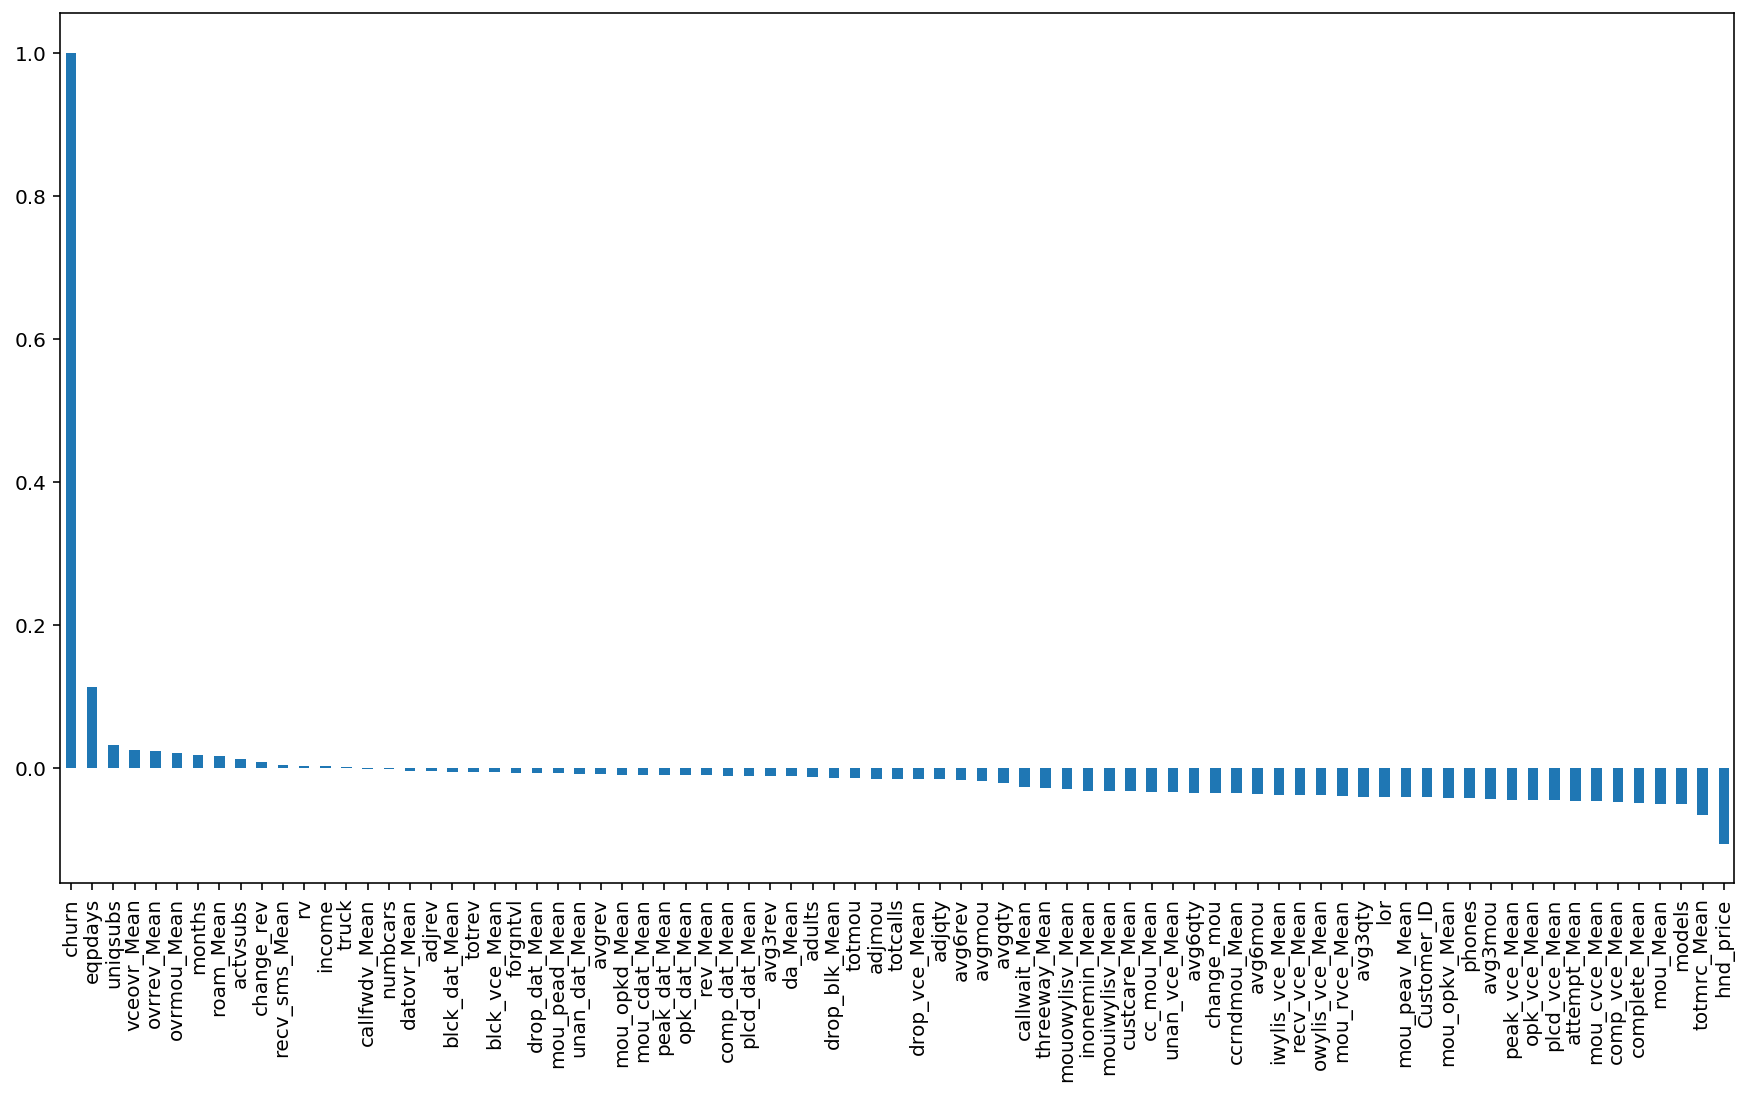

In [29]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

I dropped below features with low correlation values.

In [30]:
data.drop(['blck_dat_Mean','adjrev','datovr_Mean','numbcars','callfwdv_Mean','truck','income','rv','recv_sms_Mean','change_rev'], axis=1, inplace=True)

In [31]:
data=data.drop(['Customer_ID'],axis=1)

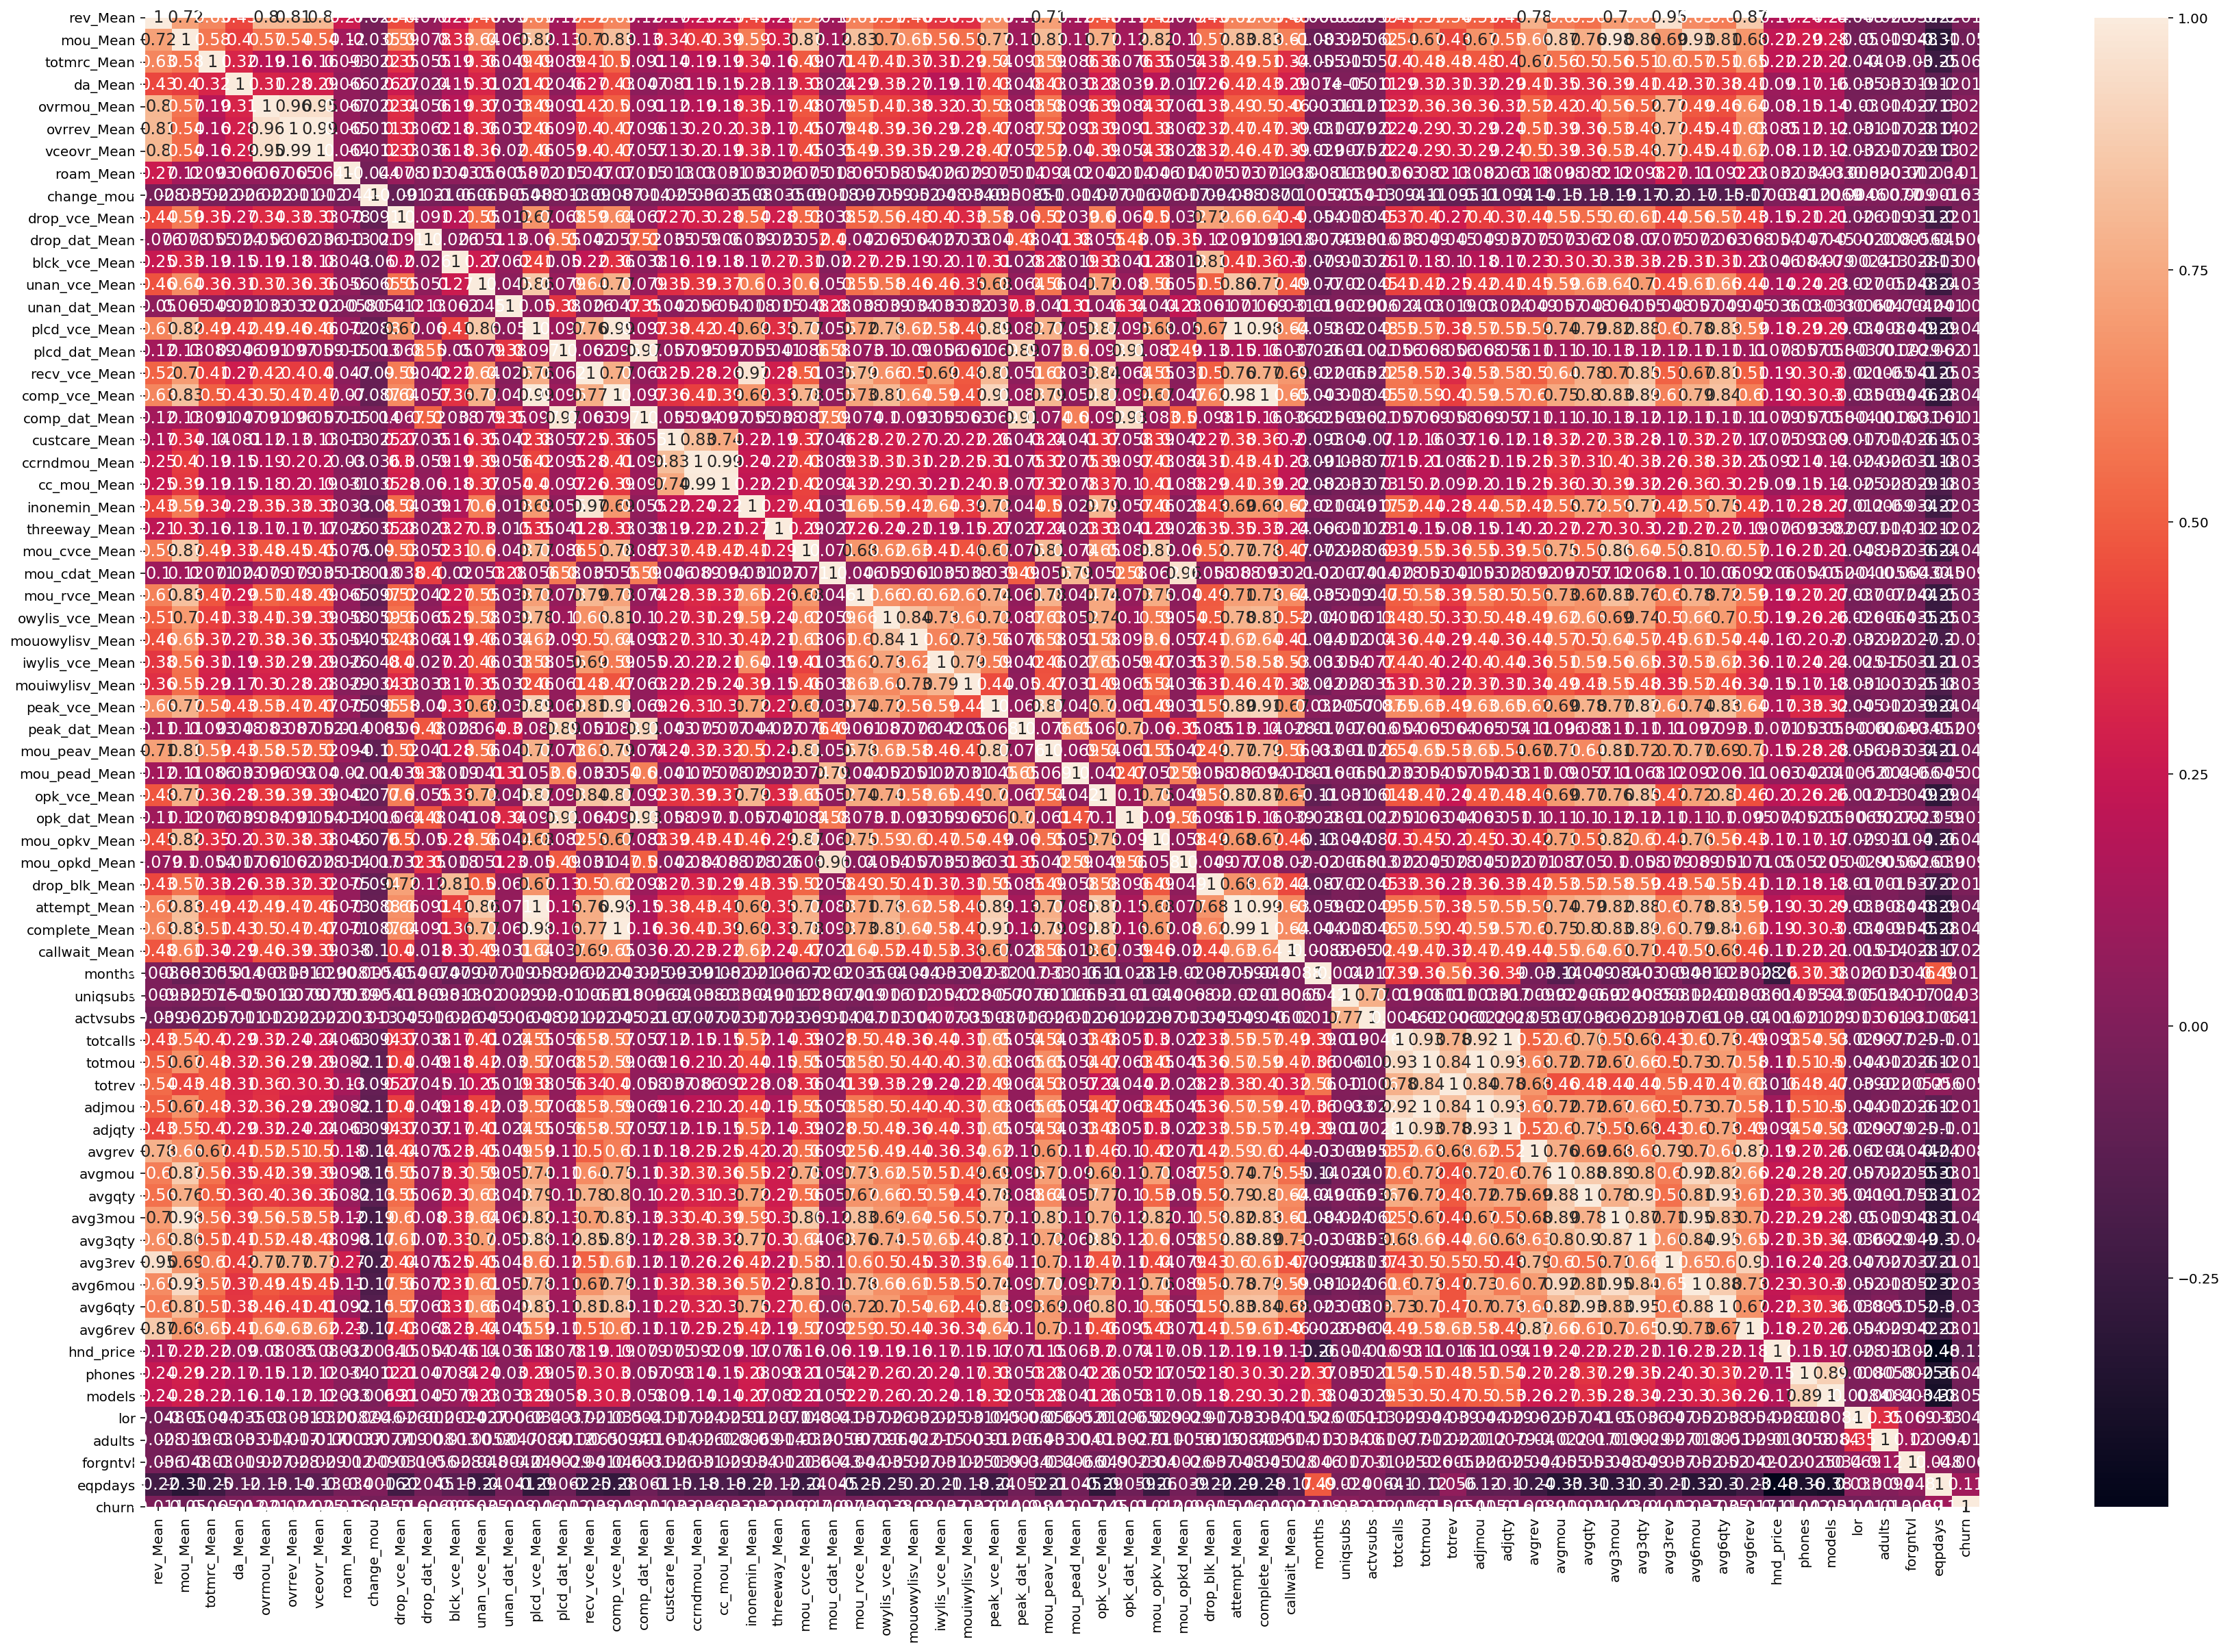

In [35]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(30,20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Rule-Based Approch

I tried to define a simple rule-based methodology without applying any machine learning algorithm to identify churn risk of the customers. However this does not work beacuse human intition and telco knowledge could not show the best features rather than machine learning algorithms.

## Scaling and Encoding

In [36]:
data = pd.get_dummies(data) # Encoding with get_dummies

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. IIt’s non-distorting.I could use RobustScaler if I have outliers and want to reduce their influence.

In [37]:
names = data.columns

In [38]:
data = MinMaxScaler().fit_transform(data) # Standardization

In [39]:
data = pd.DataFrame(data, columns=names) # Convert to DataFrame

## Churn Prediction Models

In [40]:
# Create Train & Test Data

Y = data["churn"].values
X = data.drop(labels = ["churn"],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Logistic Regression

In [41]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [42]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Accuracy : "+str(round(metrics.accuracy_score(y_test, prediction_test),2)))
print ("F1 Score : "+str(round(metrics.f1_score(y_test, prediction_test,average='weighted'),2)))

Accuracy : 0.59
F1 Score : 0.59


### RECURSIVE FEATURE ELIMINATION (RFE) METHOD FOR FEATURE SELECTION

In [43]:
# Identifying top 50 variables our of 100
rfe_model = RFE(model, 50)
rfe_fit = rfe_model.fit(X_train, y_train)
 
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(data.columns[feature_list_index])


rev_Mean
mou_Mean
totmrc_Mean
da_Mean
ovrmou_Mean
ovrrev_Mean
vceovr_Mean
roam_Mean
change_mou
drop_vce_Mean
plcd_vce_Mean
plcd_dat_Mean
custcare_Mean
ccrndmou_Mean
threeway_Mean
mou_cvce_Mean
mou_rvce_Mean
mouowylisv_Mean
peak_vce_Mean
mou_peav_Mean
opk_vce_Mean
drop_blk_Mean
callwait_Mean
months
uniqsubs
totmou
totrev
adjmou
avgmou
avgqty
avg3mou
avg3qty
avg3rev
hnd_price
phones
models
eqpdays
crclscod_A
crclscod_C2
crclscod_D4
crclscod_E
crclscod_E2
crclscod_G
crclscod_M
area_TENNESSEE AREA
dwllsize_unknown
ethnic_B
ethnic_J
ethnic_O
ethnic_U


In [44]:
datatmp=data.iloc[:,rfe_fit.get_support(indices=True)]
datatmp['churn']=data['churn']

In [45]:
importance = model.feature_importances_
importances = pd.DataFrame(importance)

dictionary = dict(zip(datatmp.columns, model.feature_importances_))

feature_matrix = pd.DataFrame(dictionary, index=[0])
featurex = feature_matrix.T
featurex.columns = ['meas']

#Check the score for every column in the DF
sorted = featurex.sort_values(by=['meas'], ascending=False)
with pd.option_context("display.max_rows", 10000): 
    print(sorted)


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [46]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[1.763e-01 1.007e+01 5.196e+00 5.546e-01 1.204e+00 2.241e+00 2.361e+00
 9.555e-01 1.592e-01 7.589e-01 3.282e-01 1.609e-01 3.747e+00 3.976e-01
 7.939e+00 1.132e+00 3.682e+00 8.078e+00 1.067e+00 1.430e+00 2.595e+00
 2.759e+00 2.536e+00 2.607e+00 8.348e+00 6.069e-01 8.385e+00 5.505e+00
 2.138e+00 4.391e+00 5.037e+00 5.722e+00 8.735e-01 5.346e+00 3.032e-01
 7.729e+00 8.905e-01 9.699e+00 5.646e-01 5.362e-01 8.121e+00 8.265e+00
 2.787e+00 2.126e+00 7.192e-01 4.971e-02 7.425e-01 4.550e-01 5.252e-02
 4.897e-01 7.820e-01 1.265e-01 1.304e+00 1.289e+00 6.866e+00 4.305e+00
 2.215e-01 4.813e+00 3.406e+00 4.669e-01 4.643e+01 7.319e+00 1.272e+01
 1.386e+01 1.722e+00 2.195e+00 5.827e+01 2.667e-03 1.539e+00 5.097e+00
 1.780e+01 4.396e+01 6.312e+00 9.034e+00 1.344e+00 1.622e+01 2.687e-01
 1.372e+00 5.114e+00 1.717e+01 2.344e-01 8.609e-01 9.313e-01 1.984e+00
 9.077e+00 3.088e+01 6.096e+00 4.869e+00 4.453e+00 5.407e+01 1.037e+02
 1.905e+00 9.921e-01 2.288e-02 5.493e-02 2.019e+00 3.474e-04 3.158e-05
 1.229

In [47]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

avgmou                                3.018090
rev_Mean                              2.509603
roam_Mean                             1.906498
uniqsubs                              1.790628
eqpdays                               1.777324
vceovr_Mean                           1.645318
ovrrev_Mean                           1.506723
phones                                1.224095
da_Mean                               0.913726
ovrmou_Mean                           0.862007
totmou                                0.820906
adjmou                                0.725884
avgqty                                0.660643
drop_vce_Mean                         0.655022
area_unknown                          0.635836
drop_blk_Mean                         0.626775
blck_vce_Mean                         0.604040
mouowylisv_Mean                       0.601784
crclscod_A2                           0.588107
models                                0.547522
mou_rvce_Mean                         0.511382
avgrev       

### Decision Tree

In [48]:
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(criterion = "gini",min_samples_leaf=5,random_state = 100,max_depth = 3)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train, y=y_train)
decisionTree = decisionTree.fit(X=X_train, y=y_train)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)

'decision_tree.gv.pdf'

In [49]:
test_y_pred_dt = decisionTree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))
print ("F1 Score : "+str(round(metrics.f1_score(y_test, test_y_pred_dt,average='weighted'),2)))

Accuracy of decision tree classifier on test set: 0.59
F1 Score : 0.58


## 3-Fold-Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=3, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.5910142895604182), (4, 0.5895595183418832), (5, 0.5937529116411523), (6, 0.5983169725047025), (7, 0.5969476297370342), (8, 0.5901581301995033), (9, 0.5903865261015465), (10, 0.5848527463054626), (11, 0.581999781028733), (12, 0.5798032644728818), (13, 0.5749822078408803), (14, 0.5713022665261479), (15, 0.5700755640803472), (16, 0.565225966199067), (17, 0.5616315778354891), (18, 0.5605474961874165), (19, 0.5581229718932346)]


In [48]:
depth

[(3, 0.5910142895604182),
 (4, 0.5895595183418832),
 (5, 0.5937529116411523),
 (6, 0.5983169725047025),
 (7, 0.5969476297370342),
 (8, 0.5901581301995033),
 (9, 0.5903865261015465),
 (10, 0.5848527463054626),
 (11, 0.581999781028733),
 (12, 0.5798032644728818),
 (13, 0.5749822078408803),
 (14, 0.5713022665261479),
 (15, 0.5700755640803472),
 (16, 0.565225966199067),
 (17, 0.5616315778354891),
 (18, 0.5605474961874165),
 (19, 0.5581229718932346)]

## Grid Search Optimizer

In [49]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters,scoring='accuracy', n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5983169305377264 {'max_depth': 6}


## Max_Depth Optimization

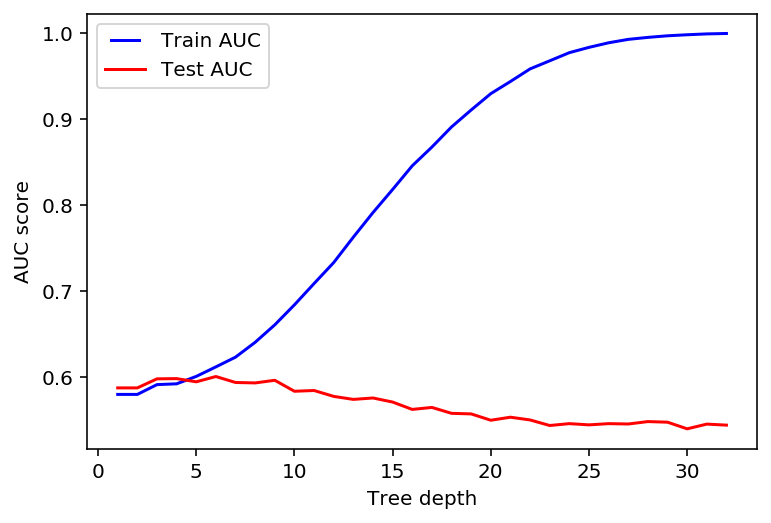

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results,'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data. Increasing the number of tree depth may result in overfitting also. In our case, using 6 trees is optimal.

## Min_Samples_Split Optimization

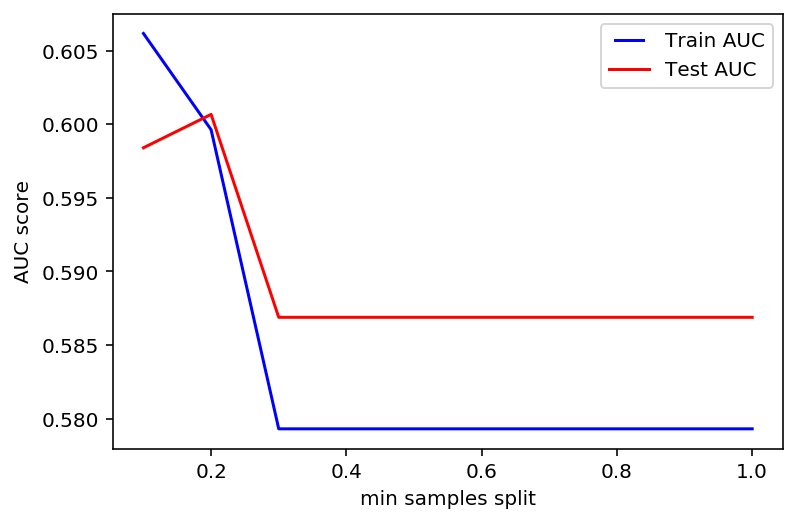

In [51]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = DecisionTreeClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data. The optimal value is 0.2

## Re-Training Decision Tree with Tuned Parameters

In [54]:
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(criterion = "gini",min_samples_split=0.2,random_state = 100,max_depth = 6)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train, y=y_train)
decisionTree = decisionTree.fit(X=X_train, y=y_train)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)

'decision_tree.gv.pdf'

In [55]:
test_y_pred_dt = decisionTree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))
print ("F1 Score : "+str(round(metrics.f1_score(y_test, test_y_pred_dt,average='weighted'),2)))

Accuracy of decision tree classifier on test set: 0.60
F1 Score : 0.6


## Random Forest

In [59]:
model = RandomForestClassifier(n_estimators = 1000, random_state = 42)

model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)

0.5956260916116413

In [64]:
print(str(round(model.score(X_test, y_test),2)))

print(str(round(metrics.f1_score(y_test, test_y_pred_dt,average='weighted'),2)))

0.62
0.6


In [69]:
importance = model.feature_importances_
importances = pd.DataFrame(importance)

dictionary = dict(zip(data.columns, model.feature_importances_))

feature_matrix = pd.DataFrame(dictionary, index=[0])
featurex = feature_matrix.T
featurex.columns = ['meas']

#Check the score for every column in the DF
sorted = featurex.sort_values(by=['meas'], ascending=False)
print(sorted)


                                            meas
eqpdays                             3.001820e-02
change_mou                          2.406396e-02
months                              2.391951e-02
totrev                              2.023001e-02
mou_Mean                            1.967571e-02
avgqty                              1.931184e-02
avgrev                              1.929681e-02
avgmou                              1.902934e-02
totcalls                            1.859973e-02
adjqty                              1.841286e-02
rev_Mean                            1.837730e-02
totmou                              1.827412e-02
adjmou                              1.821634e-02
avg3mou                             1.804721e-02
avg6mou                             1.717112e-02
avg3qty                             1.714490e-02
mou_cvce_Mean                       1.690147e-02
mou_opkv_Mean                       1.682085e-02
mou_peav_Mean                       1.677410e-02
avg6qty             

## Answers

**1)** According to my descriptive analysis, eqpdays, hnd_price, asl_flag and totmrc_Mean features affects churn probability most. The main reason that show a positive and negative relation is correlartion outputs. In addition, callfwdv_Mean, truck, income, rv features does not affects churn.

**2)** I tried to define a simple rule-based methodology without applying any machine learning algorithm to identify churn risk of the customers. However this does not work beacuse human intition and telco knowledge could not show the best features rather than machine learning algorithms.

**3)** Logistic Regression and Decision Tree Machine Learning are applied for prediction. Optimal max_depth and min_samples calculated as 6 and 0.2 with AUC curves.

**4)** Random Forest applied as an additional algorithm. Its has the maximum accuracy with all of the variables. Model parameters set as default.

**5)** I compare outputs and accuracies of Logistic Regression, Decision Tree and Random Forest models; Random Forest Algorithm has the best accuracy.

## Conclusion

In this case study, I analysed telco churn data and tried to develop a prediction model. I did descriptive analysis, preprocessing, model training and tuning processes. I used two AUC optimizations for the parameters of Decision Tree and MinMax Scaling for outliers. You can see the results in the table below.Accuracy could be increased with more appropriate machine learning algorithms and data understanding. In addition, descriptions from metadata sheet was not enough to understand values in data columns, since I could not understand 'U', 'S' and 'M' letters, I was not able to make decisions in preprocessing process.

In [66]:
from IPython.display import HTML, display
import tabulate
table = [["MODELS","ACCURACY","F1 SCORE","PARAMETERS"],
         ["Logistic Regression",0.59,0.59,'All Features'],
         ["Decision Tree",0.59,0.58,"All Features"],
         ["Decision Tree",0.60,0.60,"Tuned + with all Features"],
         ["Random Forest",0.62,0.60,"All Features"v]]
print("          TABLE of MODELS")
display(HTML(tabulate.tabulate(table, tablefmt='html')))

          TABLE of MODELS


## Further Works

In order to increase accuracy, more advanced machine learning algorithms could have applied. Furthermore, deep learning methods such as Neural Networks could have better outcomes beacuse of high number of columns with numerical values.